### 1.4: Some statistics with pandas

In [2]:
# import moduled
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### 1. Load in the SF crimes dataset:

In [3]:
crime = pd.read_csv('datasets/sf_crime.csv')

#### 2. Print the head

In [4]:
crime.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2003-03-23 23:27:00,ARSON,ARSON OF A VEHICLE,Sunday,BAYVIEW,NONE,0 Block of HUNTERS PT EXPWY EX,-122.376945,37.733018
1,2006-03-07 06:45:00,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Tuesday,NORTHERN,NONE,0 Block of MARINA BL,-122.432952,37.805052
2,2004-03-06 03:00:00,NON-CRIMINAL,LOST PROPERTY,Saturday,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421
3,2011-12-03 12:10:00,BURGLARY,"BURGLARY OF STORE, UNLAWFUL ENTRY",Saturday,TARAVAL,"ARREST, BOOKED",3200 Block of 20TH AV,-122.475647,37.728528
4,2003-01-10 00:15:00,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Friday,NORTHERN,NONE,POLK ST / BROADWAY ST,-122.421772,37.795946


#### 3. Print the unique categories and how many there are

In [5]:
crime["Category"].value_counts()

LARCENY/THEFT                  4934
OTHER OFFENSES                 3656
NON-CRIMINAL                   2601
ASSAULT                        2164
DRUG/NARCOTIC                  1533
VEHICLE THEFT                  1506
VANDALISM                      1280
WARRANTS                       1239
BURGLARY                       1023
SUSPICIOUS OCC                  891
MISSING PERSON                  771
ROBBERY                         630
FRAUD                           537
SECONDARY CODES                 283
FORGERY/COUNTERFEITING          281
WEAPON LAWS                     255
PROSTITUTION                    223
TRESPASS                        209
STOLEN PROPERTY                 137
SEX OFFENSES FORCIBLE           120
DRUNKENNESS                     105
DISORDERLY CONDUCT              105
RECOVERED VEHICLE                80
DRIVING UNDER THE INFLUENCE      75
KIDNAPPING                       71
RUNAWAY                          58
ARSON                            52
LIQUOR LAWS                 

#### 4. Print the unique districts and how many there are

In [6]:
crime["PdDistrict"].value_counts()

SOUTHERN      4413
MISSION       3416
NORTHERN      3076
BAYVIEW       2555
CENTRAL       2424
TENDERLOIN    2336
INGLESIDE     2256
TARAVAL       1804
PARK          1438
RICHMOND      1282
Name: PdDistrict, dtype: int64

#### 5. Make a DataFrame of the crime categories and the number of crimes per category

In [8]:
category_series = crime["Category"].value_counts()

category_df = pd.DataFrame({"Category": category_series.index, "Count": category_series.values})

category_df

,Category,Count
0,LARCENY/THEFT,4934
1,OTHER OFFENSES,3656
2,NON-CRIMINAL,2601
3,ASSAULT,2164
4,DRUG/NARCOTIC,1533
5,VEHICLE THEFT,1506
6,VANDALISM,1280
7,WARRANTS,1239
8,BURGLARY,1023
9,SUSPICIOUS OCC,891


#### 6. Make a DataFrame of the districts and crime counts per district

In [18]:
districts_series = crime["PdDistrict"].value_counts()

districts_df = pd.DataFrame({"District": districts_series.index, "Count": districts_series.values})

districts_df

,Count,District
0,4413,SOUTHERN
1,3416,MISSION
2,3076,NORTHERN
3,2555,BAYVIEW
4,2424,CENTRAL
5,2336,TENDERLOIN
6,2256,INGLESIDE
7,1804,TARAVAL
8,1438,PARK
9,1282,RICHMOND


#### 7. Make a DataFrame of the day of week and crime counts per day

In [16]:
day_of_week_series = crime["DayOfWeek"].value_counts()

day_of_week_df = pd.DataFrame({"Day of Week": day_of_week_series.index, "Count": day_of_week_series.values})

day_of_week_df

,Count,Day of Week
0,3883,Friday
1,3657,Wednesday
2,3579,Thursday
3,3548,Tuesday
4,3524,Monday
5,3496,Saturday
6,3313,Sunday


#### 8. Describe one of the datasets

In [21]:
category_df.describe()

,Count
count,38.000000
mean,657.894737
std,1090.802947
min,1.000000
25%,40.500000
50%,128.500000
75%,861.000000
max,4934.000000


#### 9. Calculate the mean difference between the experimental and control below

In [24]:
control = [4.8,17.3,7.0,10.8,9.4,2.6,9.0,9.6,12.7,8.5,15.8,11.0,9.7,13.1,6.3,4.4,7.8,
           9.9,7.8,7.7,12.8,13.2,6.1,7.1,6.4,11.7,11.8,6.3,14.4,9.8,14.9,11.4,9.1,10.4,
           13.2,10.0,13.5,10.1,15.0,8.8,5.3,15.1,7.6,9.9,4.9,9.2,12.3,12.1,6.9,8.3,7.0,
           6.1,13.4,11.5,6.0,12.3,5.6,14.7,3.7,7.6,10.9,10.3,10.3,10.2,7.1,6.3,13.2,9.9,
           10.6,9.8,4.9,16.9,9.1,6.7,12.2,8.2,10.1,15.5,11.9,9.7,7.9,13.4,10.6,7.9,13.1,
           11.9,11.6,2.9,13.9,14.4,8.6,7.6,8.3,12.0,5.2,7.1,13.6,6.5,9.9,14.8]

In [25]:
experimental = [15.4,14.7,14.0,25.3,15.1,14.6,0.0,20.5,16.9,18.9,20.1,16.5,13.1,16.4,
                18.3,21.3,6.3,9.0,12.1,7.4,25.6,10.8,11.4,12.1,22.7,20.1,18.3,9.4,11.0,
                14.8,12.5,12.3,16.4,13.3,14.1,15.7,12.2,15.2,16.9,1.5,18.6,4.2,12.2,8.2,
                15.3,9.3,12.0,22.8,19.7,10.7,17.8,15.4,14.5,22.2,16.7,19.3,17.1,17.4,5.4,
                10.9,13.7,17.1,11.2,15.0,18.2,14.2,11.0,19.6,10.9,13.9,17.3,11.1,19.9,
                11.2,25.1,23.7,16.5,17.9,20.1,15.8,26.4,17.7,18.9,5.6,25.6,10.4,15.5,17.7,
                22.9,18.9,21.2,5.5,13.2,13.4,21.9,11.1,13.7,16.9,16.4,18.8 ]

In [27]:
mean_difference = (sum(experimental)/len(experimental))-(sum(control)/len(control))

print mean_difference

5.413


#### 10. Calculate the t-statistic for the difference between means by hand (if you forgot it, look it up online or in the notes!)

The standard deviation component is the standard deviation across groups.

In [34]:
#np.std(control)

t_statistic = mean_difference / (np.var(control)/(len(control)**.5))

print t_statistic

5.13681844274


#### 11. Plot the control and experimental distributions using seaborn on the same plot (with different colors for each)

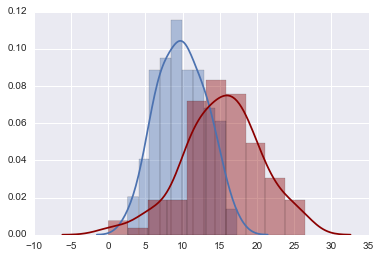

In [43]:
ax = sns.distplot(control, bins = 10)
sns.distplot(experimental, color = 'darkred', bins = 10, ax=ax)

plt.show()


#### 12. Use both Pandas and numpy to calculate the mean, median, standard deviation, min and max of the control. You'll need to convert it to a pd.Series or pd.DataFrame object.

In [57]:
print "mean", np.mean(control)
print "median", np.median(control)
print "std", np.std(control)
print "max", np.max(control)
print "min", np.min(control)

control_df = pd.DataFrame({"Number": control})
#control_df.describe()
print control_df.mean()
print control_df.median()


mean 9.857
median 9.9
std 3.24617482585
max 17.3
min 2.6
Number    9.857
dtype: float64
Number    9.9
dtype: float64


#### [BONUS] Write a function to bootstrap the 99% confidence interval for the t-statistic.

Look up: np.percentile!